In [350]:
from monte_carlo_tree_search.vanilla_tree_search import *

In [351]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [352]:
node = Node( node_state = {"p1":1, "p2":None, "p3":None})

In [95]:
node.is_terminal()

False

In [96]:
children = node.get_children()

In [97]:
len(children)

10

In [98]:
children[3].get_children()[3].node_state

{'p1': 1, 'p2': 33.33333333333333, 'p3': 16.666666666666664}

In [99]:
node.__hash__()

143821633645439971710352262231167530148

In [173]:
tree = MCTS()

In [174]:
tree.iterate(iterations=100)

5.923550281979068e-06
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14
8.460074274977409e-14


In [184]:
parameters_best = max(tree.hash_reward_table, key=tree.hash_reward_table.get)

In [195]:
node_best = tree.hash_node_table[parameters_best]

In [197]:
abs(env_function(node_best, 12)[0] - env_function(node_best, 12)[1])

5435.800782550941

In [330]:
### testing the MCTS algorithm
best_choice = []
step = 100
tree = MCTS()
for _ in range(200):
    tree.iterate(iterations=step)
    parameters_best = max(tree.hash_reward_table, key=tree.hash_reward_table.get)
    node_best = tree.hash_node_table[parameters_best]
    best_choice.append(abs(env_function(node_best, 12)[0] - env_function(node_best, 12)[1]))

/Users/mgrapotte/LabWork/sandbox_pipeline_optim/monte_carlo_tree_search/vanilla_tree_search.py:117: RuntimeWarning: divide by zero encountered in log
  if return_results:
/Users/mgrapotte/LabWork/sandbox_pipeline_optim/monte_carlo_tree_search/vanilla_tree_search.py:117: RuntimeWarning: invalid value encountered in sqrt
  if return_results:


In [331]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'absolute difference between expected value and the value obtained from the found parameters')

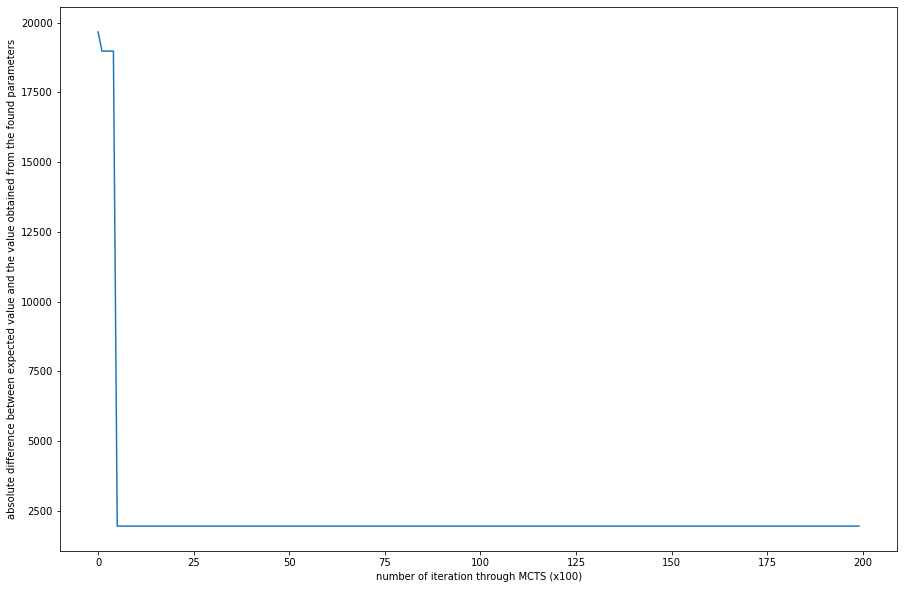

In [333]:
plt.figure(figsize=(15,10))
plt.plot(best_choice)
plt.xlabel("number of iteration through MCTS (x100)")
plt.ylabel("absolute difference between expected value and the value obtained from the found parameters")

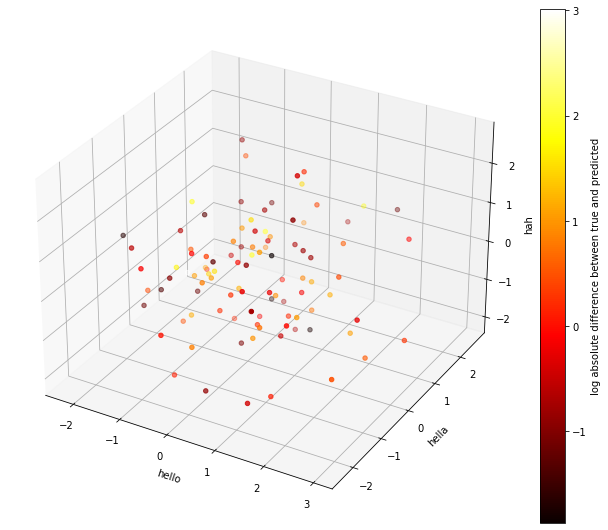

In [252]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img, fraction=0.046, pad=0.04, label="log absolute difference between true and predicted")
ax.set_xlabel("hello")
ax.set_ylabel("hella")
ax.set_zlabel("hah", rotation=90)
plt.show()

In [371]:
# we are now rolling out and setting a nice animation on the 3d plot
nb_iterations = 2000
x = []
y = []
z = []
c = []

tree = MCTS()
for _ in range(nb_iterations):
    reward, state = tree.rollout(tree.start_state, return_results=True)
    c.append(np.log(abs(env_function(state, 12)[0] - env_function(state, 12)[1])))
    x.append(state["p1"])
    y.append(state["p2"])
    z.append(state["p3"])
    """
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')


    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img, fraction=0.046, pad=0.04, label="log absolute difference between true and predicted (less is better)")
    ax.set_xlabel("p1")
    ax.set_ylabel("p2")
    ax.set_zlabel("p3", rotation=90)
    plt.savefig("figures/" + str(1)*_ + ".jpg")
    """

/Users/mgrapotte/LabWork/sandbox_pipeline_optim/monte_carlo_tree_search/vanilla_tree_search.py:117: RuntimeWarning: divide by zero encountered in log
  if return_results:
/Users/mgrapotte/LabWork/sandbox_pipeline_optim/monte_carlo_tree_search/vanilla_tree_search.py:117: RuntimeWarning: invalid value encountered in sqrt
  if return_results:


Text(0.5, 0, 'p3')

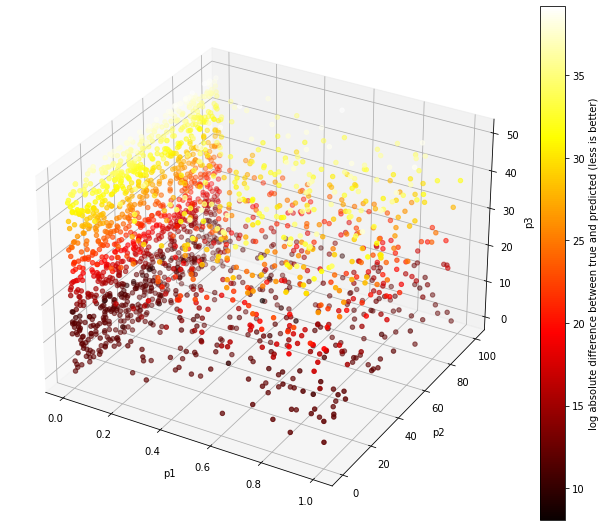

In [372]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img, fraction=0.046, pad=0.04, label="log absolute difference between true and predicted (less is better)")
ax.set_xlabel("p1")
ax.set_ylabel("p2")
ax.set_zlabel("p3", rotation=90)

In [364]:
sorted_keys = sorted(tree.N, key=tree.N.get, reverse=True)

In [366]:
for _ in range(100):
    print(tree.N[sorted_keys[_]])
    print(tree.hash_node_table[sorted_keys[_]])

844
{'p3': 0.0, 'p2': None, 'p1': None}
16
{'p3': 39.44723618090452, 'p2': None, 'p1': None}
13
{'p3': 17.587939698492463, 'p2': None, 'p1': None}
13
{'p3': 7.78894472361809, 'p2': None, 'p1': None}
13
{'p3': 10.552763819095476, 'p2': None, 'p1': None}
12
{'p3': 31.407035175879393, 'p2': None, 'p1': None}
11
{'p3': 0.7537688442211055, 'p2': None, 'p1': None}
11
{'p3': 1.507537688442211, 'p2': None, 'p1': None}
11
{'p3': 43.96984924623115, 'p2': None, 'p1': None}
11
{'p3': 36.93467336683417, 'p2': None, 'p1': None}
11
{'p3': 0.0, 'p2': 14.572864321608039, 'p1': None}
10
{'p3': 32.914572864321606, 'p2': None, 'p1': None}
10
{'p3': 38.44221105527638, 'p2': None, 'p1': None}
10
{'p3': 40.45226130653266, 'p2': None, 'p1': None}
10
{'p3': 4.0201005025125625, 'p2': None, 'p1': None}
10
{'p3': 10.30150753768844, 'p2': None, 'p1': None}
10
{'p3': 35.929648241206024, 'p2': None, 'p1': None}
10
{'p3': 22.8643216080402, 'p2': None, 'p1': None}
10
{'p3': 3.7688442211055273, 'p2': None, 'p1': None}


## checklist
well defined parameters
well defined policy function 


